# Lab Assignment 2

**Computer Vision** - Term 5, 2022

Instructor: Dr. Saumya Jetly <br>
TA: Ribhu Lahiri

*Deadline: Sunday, 13 March 2022 11:59 am* 

Submission form link: https://forms.gle/HGkVEoMgK62C7oWd7

Total points: 5 (with possible extra credit)


### Task 1: Creating and applying new filters (3 points)
The first task is to create the convolve function. As discussed in lecture, you need to implement a function which takes a filter (kernel) and convolves it over the image using a sliding window. As an output you should get the processed image.

**Extra Credit:** Create a mathematical convolution function and a correlation function. Use both on the same image with the same filter. Is there a difference in the output? (0.5 points)

In [1]:
# Imports 
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.fftpack as fp

In [6]:
# Reading in a sample image
from PIL import Image

im = cv2.imread("./cube.jpg", 0)

**Implement the convolve function** *(2 points)*

Use the helper method `sliding_window` to create a function that uses the sliding window to convolve over a given image.

In [3]:
# Task: 
def calc_target_size(img_x_size,img_y_size,kernel_size):
  num_pixels_x=0
  num_pixels_y=0
  
  for i in range(img_x_size):
    add=i+kernel_size
    if add<=img_x_size:
      num_pixels_x+=1
  for i in range(img_y_size):
    add=i+kernel_size
    if add<=img_y_size:
      num_pixels_y+=1    
   
  return num_pixels_x ,num_pixels_y 



def sliding_window(receptive_field, filter):
    ''' 
    Convolves a filter over the receptive field from the image

    Parameters
    ----------
    receptive_field: np.ndarray
        The portion of the image the convolution is being done over

    filter: np.ndarray
        The defined filter

    Returns
    -------
    np.ndarray
        The convolved receptive field output

    '''
  
    return np.sum(filter * receptive_field)
    
def convolve(image, kernel):
    ''' 
    Convolves the filter over the image (sliding window)

    Parameters
    ----------
    image: np.ndarray
        The image as a 2-dimensional matrix

    kernel: np.ndarray
        The defined filter

    Returns
    -------
    output_image: np.ndarray
        The image after convolving the filter over it
    '''
    
    tgt_size_x,tgt_size_y= calc_target_size(
        img_x_size=image.shape[0],
        img_y_size=image.shape[1],
        kernel_size=kernel.shape[0]
    )
    kernel_size=kernel.shape[0]
    convolved_img = np.zeros(shape=(tgt_size_x, tgt_size_y))
    for i in range(tgt_size_x):
      for j in range(tgt_size_y):
        matrix=image[i:i+kernel_size,j:j+kernel_size]
        convolved_img[i,j]=sliding_window(matrix, kernel)
    return np.array(convolved_img)
    

    

    

Sample Sharpen filter to check functionality

In [8]:
image_array = np.asarray(im)

# Sharpen
filter = np.array(([0, -1, 0], 
                   [-1, 7, -1], 
                   [0, -1, 0]))

In [10]:
filtered_im = convolve(image_array, filter)

### **Correlated image**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6f591bfc90>,
 Text(0.5, 1.0, 'Sharpened'))

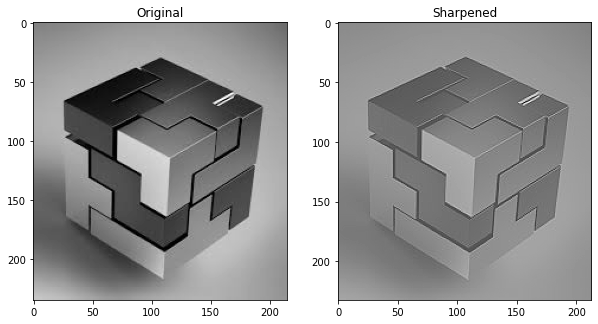

In [12]:
fsize = (10,6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Sharpened')

In [17]:
def filp(filter):
  filter1=np.flip(filter, 1)
  filter1=np.flip(filter1, 0)
  return filter1

### **Convoluted image**

(<matplotlib.axes._subplots.AxesSubplot at 0x7fea407eead0>,
 Text(0.5, 1.0, 'Sharpened'))

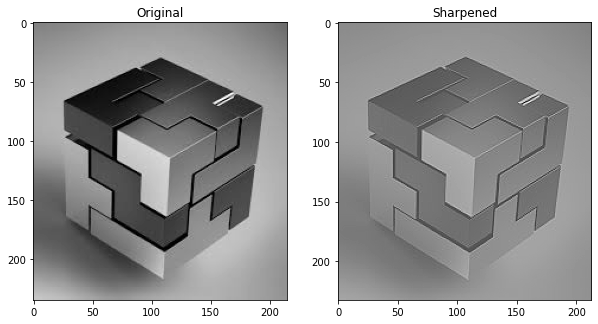

In [32]:
flipped_filter=filp(filter)
fsize = (10,6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Sharpened')


here there appears to be no visible difference between correlated and convoluted image

Sobel filters to check functionality

In [13]:
# Sobel filters
sobel_vert = np.array(([1, 0, -1], 
                       [2, 0, -2], 
                       [1, 0, -1]))

sobel_hor = np.array(([1,2,1], 
                      [0,0,0], 
                      [-1,-2,-1]))

filtered_v = convolve(image_array, sobel_vert)
filtered_h = convolve(image_array, sobel_hor)

### **Correlated**

(<matplotlib.axes._subplots.AxesSubplot at 0x7fea4072dc90>,
 Text(0.5, 1.0, 'Sobel Horizontal'))

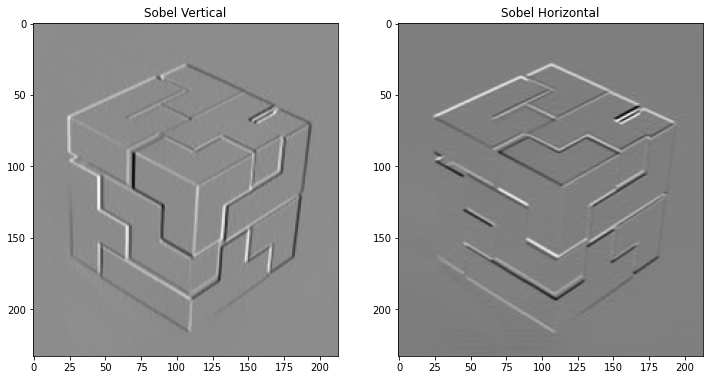

In [34]:
fsize = (12,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(filtered_v, 'gray'), plt.title('Sobel Vertical')
plt.subplot(122), plt.imshow(filtered_h, 'gray'), plt.title('Sobel Horizontal')

In [35]:
#Combining them
sobel_edge_detector = np.sqrt(filtered_h**2 + filtered_v**2)

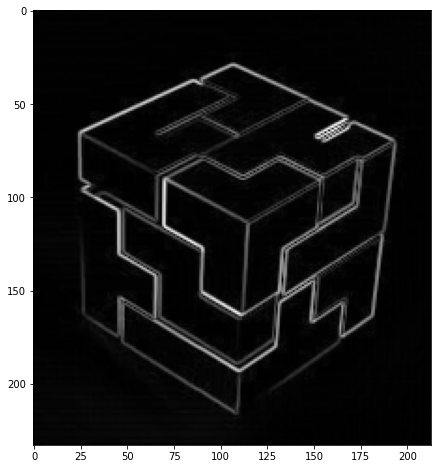

In [36]:
plt.figure(figsize=fsize)
plt.imshow(sobel_edge_detector, 'gray')

In [21]:
# Sobel filters
flipped_sobel_vert = filp(sobel_vert)

flipped_sobel_hor = filp(sobel_hor)

filtered_v_flip = convolve(image_array, flipped_sobel_vert)
filtered_h_flip = convolve(image_array, flipped_sobel_hor)

In [22]:
#Combining them
sobel_edge_detector_flip = np.sqrt(filtered_h_flip**2 + filtered_v_flip**2)

### **Convoluted image**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6f56e55050>,
 Text(0.5, 1.0, 'Sobel Horizontal'))

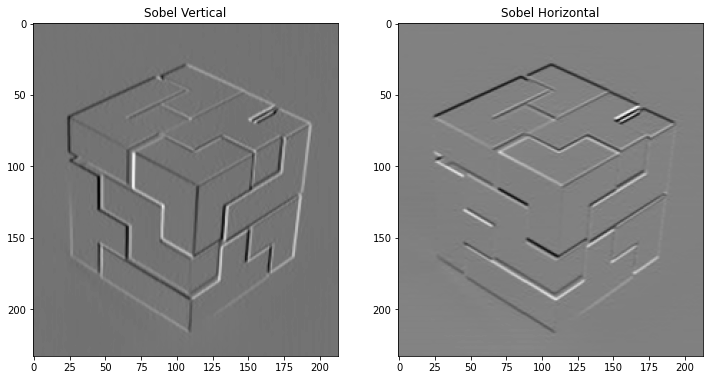

In [23]:
fsize = (12,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(filtered_v, 'gray'), plt.title('Sobel Vertical')
plt.subplot(122), plt.imshow(filtered_h, 'gray'), plt.title('Sobel Horizontal')

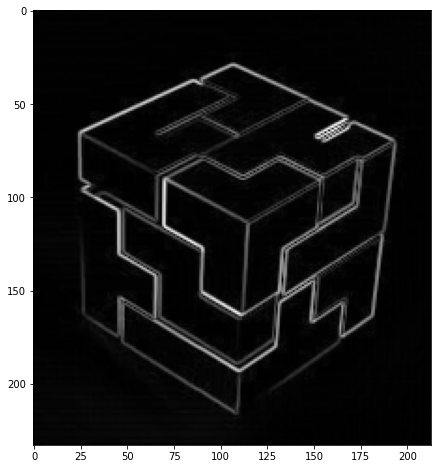

In [24]:
plt.figure(figsize=fsize)
plt.imshow(sobel_edge_detector_flip, 'gray')

here there appears to be a visible difference between correlated and convoluted sobel_vertical image and there is a difference correlated and convoluted sobel_horizontal image

**Try the convolve function with your own filter** *(1 points)*

Create your own filter (or use one from Google) and convolve it over your imported image

In [43]:
# TODO:
# YOUR FILTER HERE
#filter = np.array((1 / 16)*( [1, 2, 1], [2, 4, 2], [1, 2, 1]))
filter = np.array(([1/16, 2/16, 1/16], 
                       [2/16, 4/16, 2/16], 
                       [1/16, 2/16, 1/16]))




In [44]:
filter = filp(filter)

In [45]:
filtered_im = convolve(image_array, filter)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fea405702d0>,
 Text(0.5, 1.0, 'Filtered'))

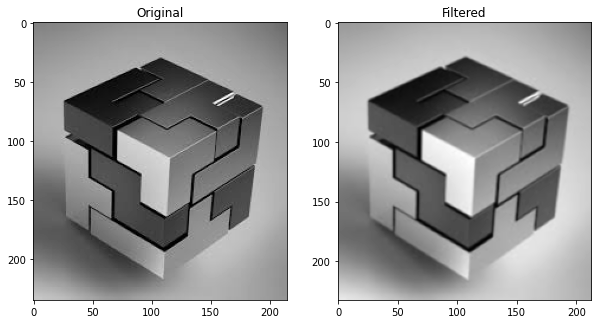

In [46]:
fsize = (10,6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Filtered')

### Task 2: Creating and applying Hough filter (2 points)

**Implement Hough Transform** *(2 points)*

Create a Hough Transform to detect ***rectangles*** in a given image. It might not be perfect due to the hyperparameters you pick but your goal should be to implement the function.

Feel free to use the helper canny function along with any other inbuilt opencv methods

**Extra Credit:** Implement the Hough Transform from scratch, i.e. without using openCV (0.5 points)

In [20]:
import cv2
from google.colab.patches import cv2_imshow

In [94]:
def canny(img):
  '''
  Applies the canny filter to detect edges in a given image

  Parameters
  ----------
  img: np.ndarray
      The image as a 2-dimensional matrix

  Returns
  -------
  edges: np.ndarray
      The image after applying canny filter, i.e. with edges
      highlighted
  '''
  low_threshold = 50
  high_threshold = 100
  edges = cv2.Canny(img, low_threshold, high_threshold)
  return edges

def hough(img):
  '''
    Apply Hough Transform to a given image to detect rectangles.

    Parameters
    ----------
    img: np.ndarray
        The image as a 2-dimensional matrix

    Returns
    -------
    edges: np.ndarray
        The image after applying hough transform, i.e. with rectangles
        highlighted
  '''
  #edges detected in the image
  edges = canny(img)
  lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
  minLineLength = 30
  maxLineGap = 10
  lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
  for x in range(0, len(lines)):
      for x1,y1,x2,y2 in lines[x]:
          cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
  return img
   








































































































































































































































































































































































































































       

  
  



In [92]:
im = cv2.imread("./img1.jpeg", 0)

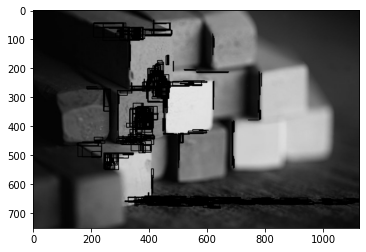

In [95]:
plt.imshow(cv2.cvtColor(hough(im), cv2.COLOR_GRAY2RGB))